In [3]:
# importing librearies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.1f}'.format)

## Load dataset

In [5]:
df = pd.read_csv('./spotify-2023.csv', encoding='ISO-8859-1')


In [6]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [8]:
#combine the columns into a single 'release_date' column
df['release_date'] = pd.to_datetime(df['released_year'].astype(str) + '-' +
                                    df['released_month'].astype(str) + '-' +
                                    df['released_day'].astype(str))

#drop the original year, month, and day columns
df.drop(columns=['released_year', 'released_month', 'released_day'], inplace=True)

In [9]:
df.head()

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,2023-05-18


Another thing I discovered is there are columns that we are not gonna use or have benefit from them like the bpm (beats per minute), key and mode columns so we will drop them

In [10]:
df.drop(columns=['bpm', 'key', 'mode'], inplace=True)

In [11]:
df.head()

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,826,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,382,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,949,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,548,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,425,65,23,80,14,63,11,6,2023-05-18


In [13]:
df.shape

(953, 19)

In [14]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
release_date             0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [18]:
#check for duplicates in the 'track_name' column
df[df['track_name'].duplicated()]

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
417,Die For You,Joji,1,1703,0,246390068,38,45,36,16,0,47,15,52,38,13,29,5,2022-11-04
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,10585,0,473248298,126,108,406,0,0,60,86,32,88,0,34,6,1950-01-01
482,SPIT IN MY FACE!,ThxSoMch,1,573,0,301869854,1,0,18,0,24,70,57,57,9,20,11,7,2022-10-31
616,Take My Breath,The Weeknd,1,6392,0,432702334,174,73,344,0,0,75,53,74,2,0,11,5,2021-08-06
764,About Damn Time,Lizzo,1,9021,0,723894473,242,49,272,21,24,84,72,74,10,0,34,7,2022-04-14
825,Flowers,Lauren Spencer Smith,1,801,0,184826429,42,9,24,1,1,70,31,44,84,0,9,39,2021-08-09
831,Daylight,Harry Styles,1,2775,0,290833204,21,11,40,0,0,69,63,45,48,0,18,4,2022-05-20
852,Numb,"Marshmello, Khalid",2,3879,2,295307001,107,76,86,1,9,91,63,77,12,1,10,5,2022-06-10
873,SNAP,Rosa Linn,1,1818,0,711366595,3,0,63,0,353,56,52,64,11,0,45,7,2022-03-19
922,Miss You,Southstar,1,2020,0,154356956,77,10,119,0,40,66,24,58,17,0,19,5,1982-05-16


In [21]:
df = df.drop([574])
df['streams'] = pd.to_numeric(df['streams'])

In [24]:
# converting the streams column to numeric format
df['streams'] = pd.to_numeric(df['streams'])
df = df.sort_values(by='streams', ascending=False)

In [25]:
df = df.drop_duplicates(subset='track_name', keep='first')

In [26]:
#check for duplicates in the 'track_name' column
df[df['track_name'].duplicated()]

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 55 to 123
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            942 non-null    object        
 1   artist(s)_name        942 non-null    object        
 2   artist_count          942 non-null    int64         
 3   in_spotify_playlists  942 non-null    int64         
 4   in_spotify_charts     942 non-null    int64         
 5   streams               942 non-null    int64         
 6   in_apple_playlists    942 non-null    int64         
 7   in_apple_charts       942 non-null    int64         
 8   in_deezer_playlists   942 non-null    object        
 9   in_deezer_charts      942 non-null    int64         
 10  in_shazam_charts      892 non-null    object        
 11  danceability_%        942 non-null    int64         
 12  valence_%             942 non-null    int64         
 13  energy_%              94

In [28]:
df.describe()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
count,942.0,942.0,942.0,942.0,942.0,942.0,942.0,942.0,942.0,942.0,942.0,942.0,942.0,942.0,942
mean,1.6,5224.1,12.1,515894838.7,67.9,52.2,2.7,67.0,51.4,64.3,27.0,1.6,18.2,10.2,2018-10-24 20:56:33.630573312
min,1.0,31.0,0.0,2762.0,0.0,0.0,0.0,23.0,4.0,9.0,0.0,0.0,3.0,2.0,1930-01-01 00:00:00
25%,1.0,873.5,0.0,140668180.0,13.0,7.0,0.0,57.0,32.2,53.0,6.0,0.0,10.0,4.0,2020-07-02 18:00:00
50%,1.0,2216.5,4.0,289165138.5,34.0,39.0,0.0,69.0,51.0,66.0,18.0,0.0,12.0,6.0,2022-04-08 00:00:00
75%,2.0,5637.2,16.0,674004814.0,87.8,87.0,2.0,78.0,70.0,77.0,43.0,0.0,23.0,11.0,2022-11-04 00:00:00
max,8.0,52898.0,147.0,3703895074.0,672.0,275.0,58.0,96.0,97.0,97.0,97.0,91.0,97.0,64.0,2023-07-14 00:00:00
std,0.9,7936.2,19.6,569217397.6,86.6,50.7,6.0,14.6,23.5,16.5,25.9,8.4,13.7,9.9,NaN


In [29]:
df.drop(columns = ['in_shazam_charts'], inplace = True)

In [30]:
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
release_date            0
dtype: int64

In [31]:
#remove commas from 'in_shazam_charts' column due to the above error
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '')

#convert 'in_shazam_charts' column to numeric
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'])

In [32]:
df.dtypes

track_name                      object
artist(s)_name                  object
artist_count                     int64
in_spotify_playlists             int64
in_spotify_charts                int64
streams                          int64
in_apple_playlists               int64
in_apple_charts                  int64
in_deezer_playlists              int64
in_deezer_charts                 int64
danceability_%                   int64
valence_%                        int64
energy_%                         int64
acousticness_%                   int64
instrumentalness_%               int64
liveness_%                       int64
speechiness_%                    int64
release_date            datetime64[ns]
dtype: object

## Visualization

In [33]:
df

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
55,Blinding Lights,The Weeknd,1,43899,69,3703895074,672,199,3421,20,50,38,80,0,0,9,7,2019-11-29
179,Shape of You,Ed Sheeran,1,32181,10,3562543890,33,0,6808,7,83,93,65,58,0,9,8,2017-01-06
86,Someone You Loved,Lewis Capaldi,1,17836,53,2887241814,440,125,1800,0,50,45,41,75,0,11,3,2018-11-08
620,Dance Monkey,Tones and I,1,24529,0,2864791672,533,167,3595,6,82,54,59,69,0,18,10,2019-05-10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,24094,78,2808096550,372,117,843,4,76,91,50,54,0,7,5,2018-10-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Overdrive,Post Malone,1,410,36,14780425,36,32,31,1,56,48,73,0,0,35,4,2023-07-14
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,293,8,11956641,5,2,30,2,93,68,65,42,0,12,25,2023-06-01
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,437,31,11599388,17,29,26,3,79,92,89,5,0,6,5,2023-07-13
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,138,4,1365184,13,78,2,0,82,62,74,10,0,33,7,2022-12-22


## Top 10 Artists having the most streamed songs in 2023

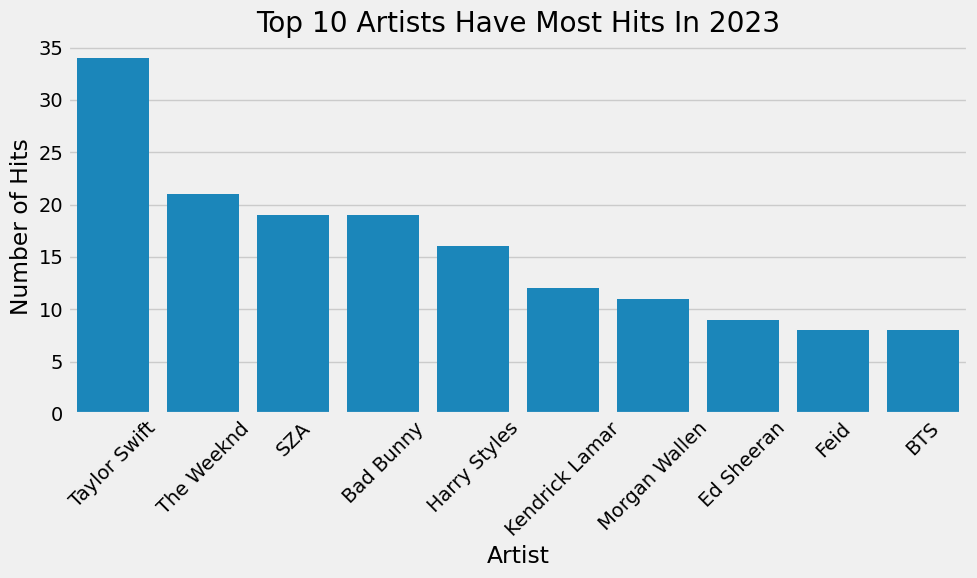

In [35]:
#count the number of songs released by each artist
artist_counts = df['artist(s)_name'].value_counts()

#select the top 10 artists
top_artists = artist_counts.head(10)

#the barplot represents Top 10 Artists Have Most Streamed Songs in 2023
plt.figure(figsize = (10, 6))

sns.barplot(x = top_artists.index, y = top_artists.values)

plt.title('Top 10 Artists Have Most Hits In 2023')
plt.xlabel('Artist')
plt.ylabel('Number of Hits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 10 most Streamed songs in 2023

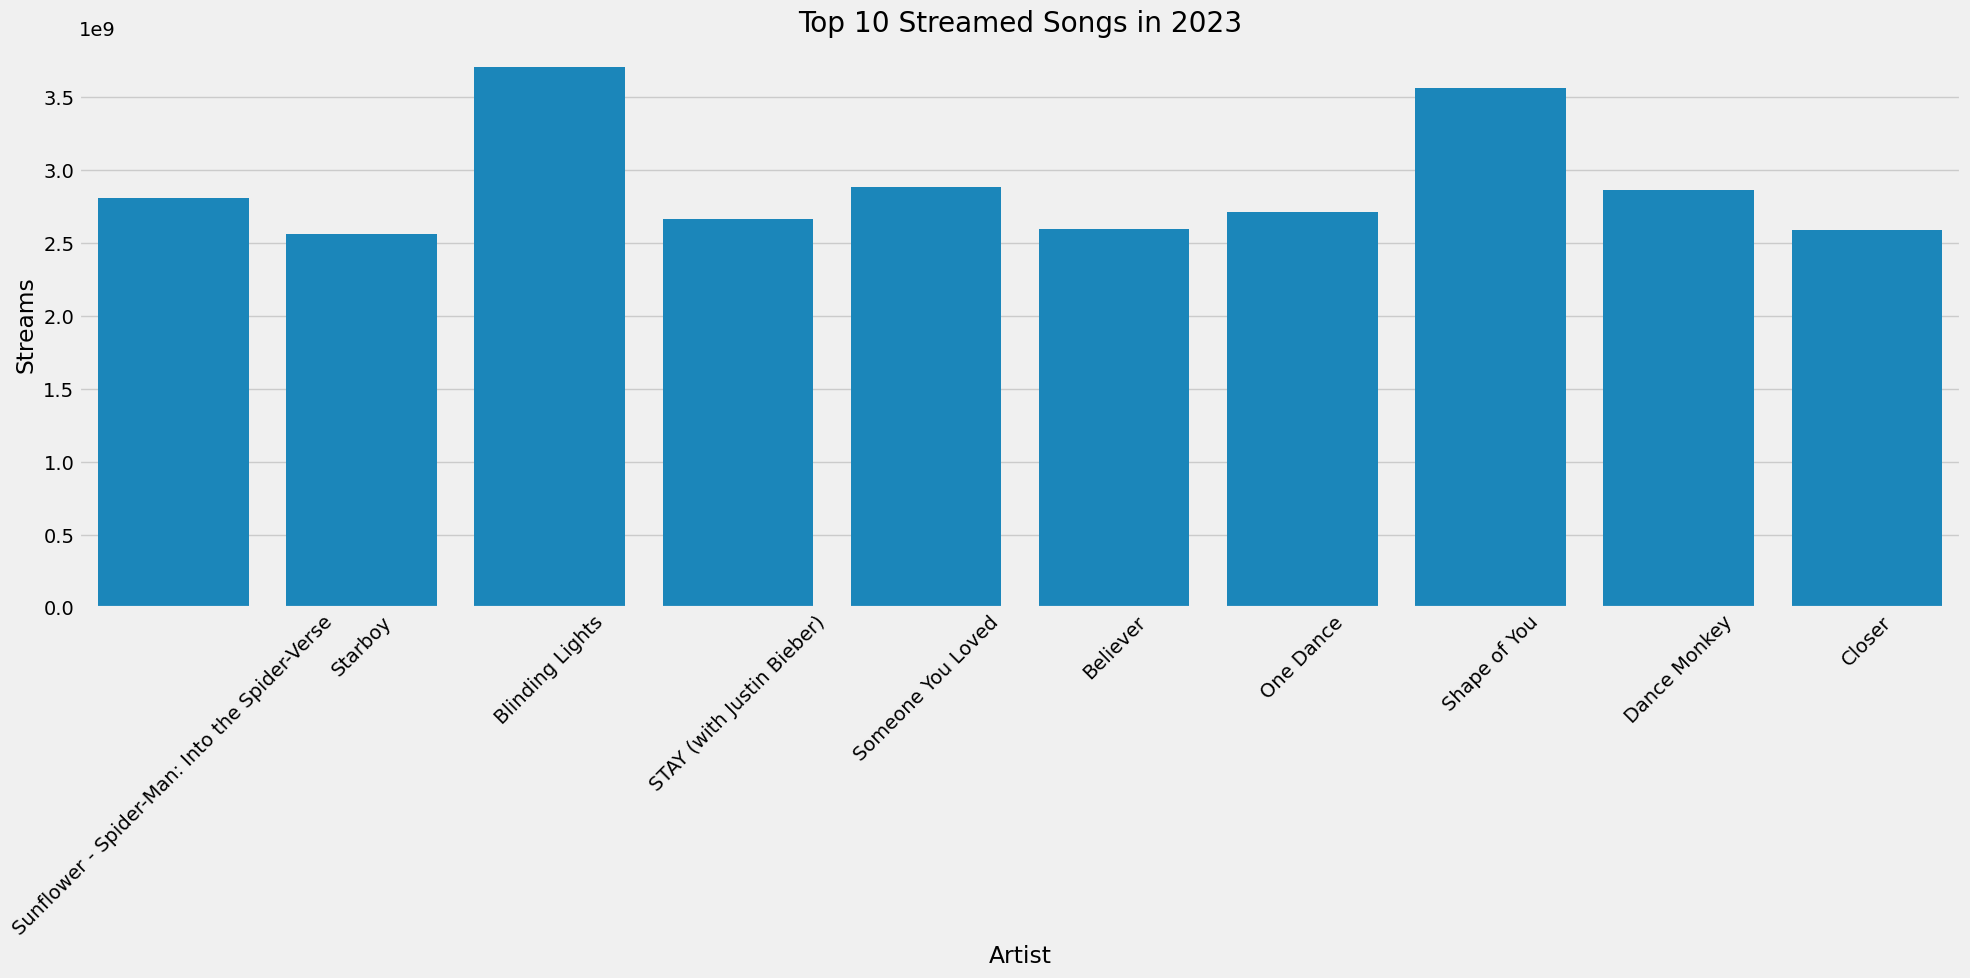

In [37]:
plt.figure(figsize = (20, 10))

sns.barplot(x = df.track_name[:10], y = df.streams)

plt.title('Top 10 Streamed Songs in 2023')
plt.xlabel('Artist')
plt.ylabel('Streams')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Relationship Between The Number Of Artists In A Song and Streams In 2023

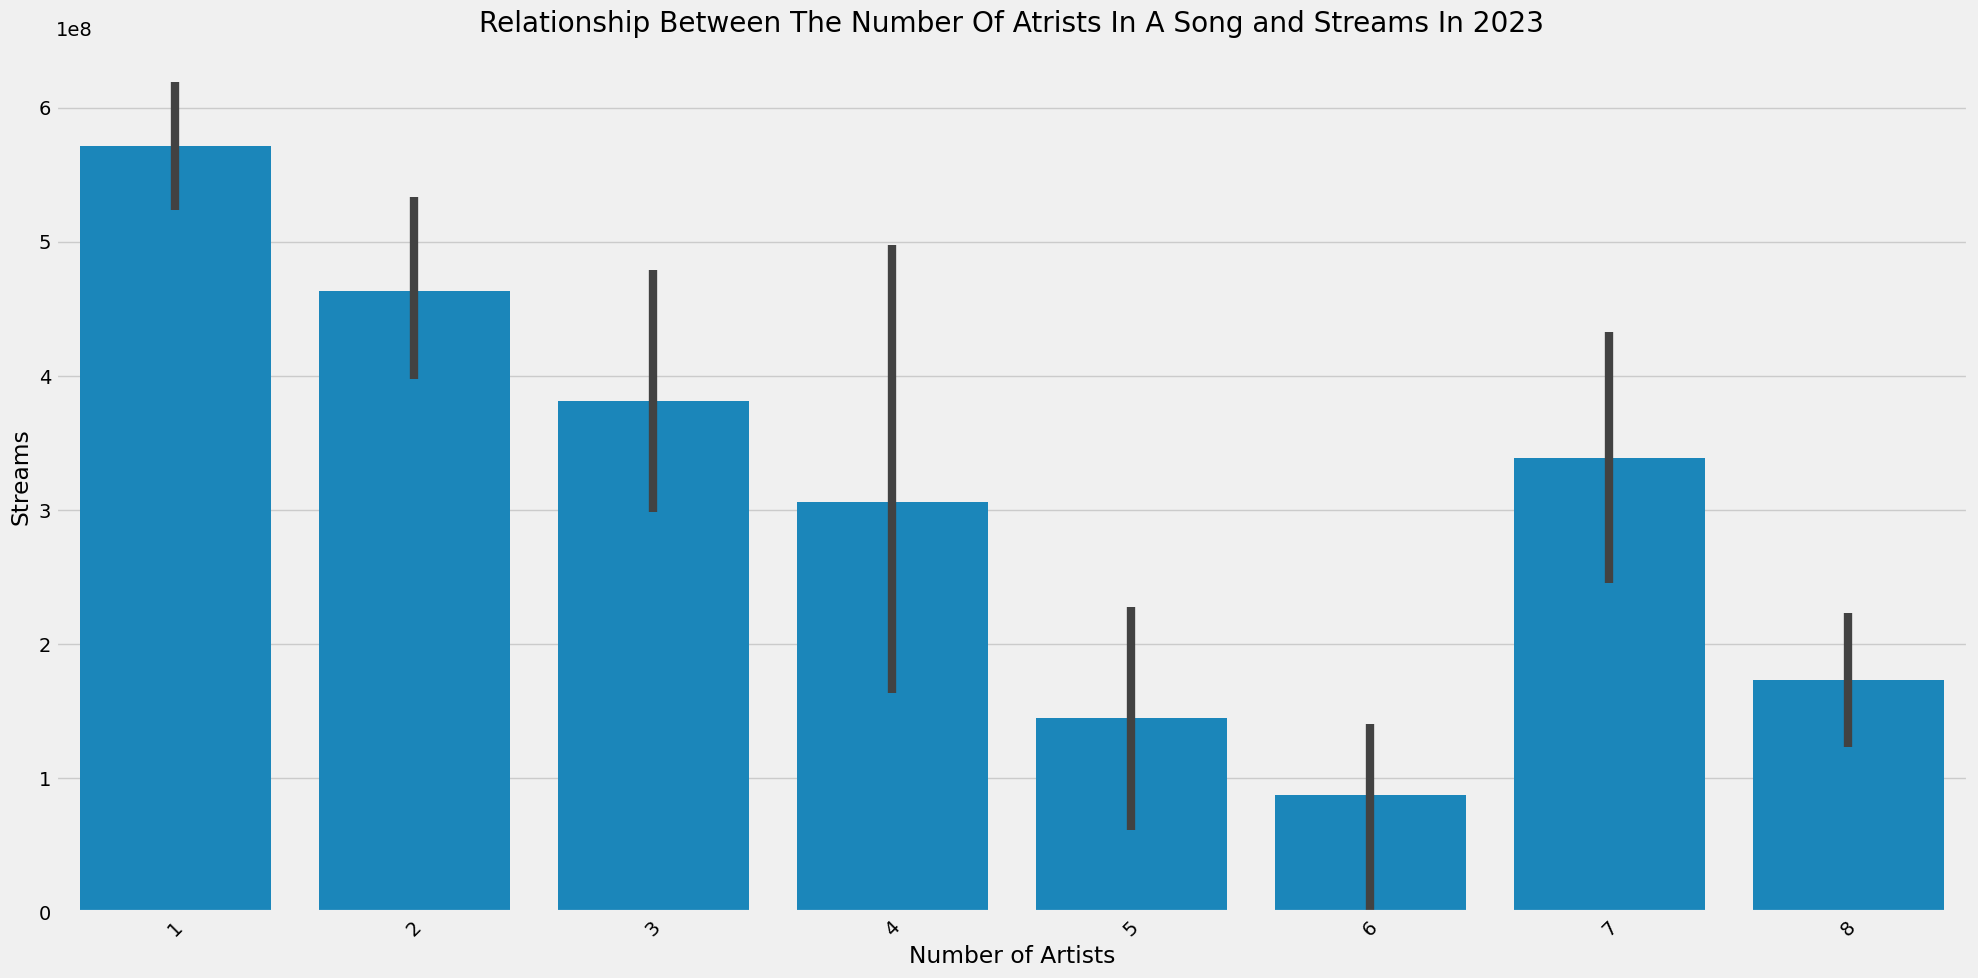

In [39]:
plt.figure(figsize = (20, 10))

sns.barplot(x = df.artist_count, y = df.streams)

plt.title('Relationship Between The Number Of Atrists In A Song and Streams In 2023')
plt.xlabel('Number of Artists')
plt.ylabel('Streams')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Relationship Between Most Streamed Songs And Platforms In 2023


### Spotify PLatform


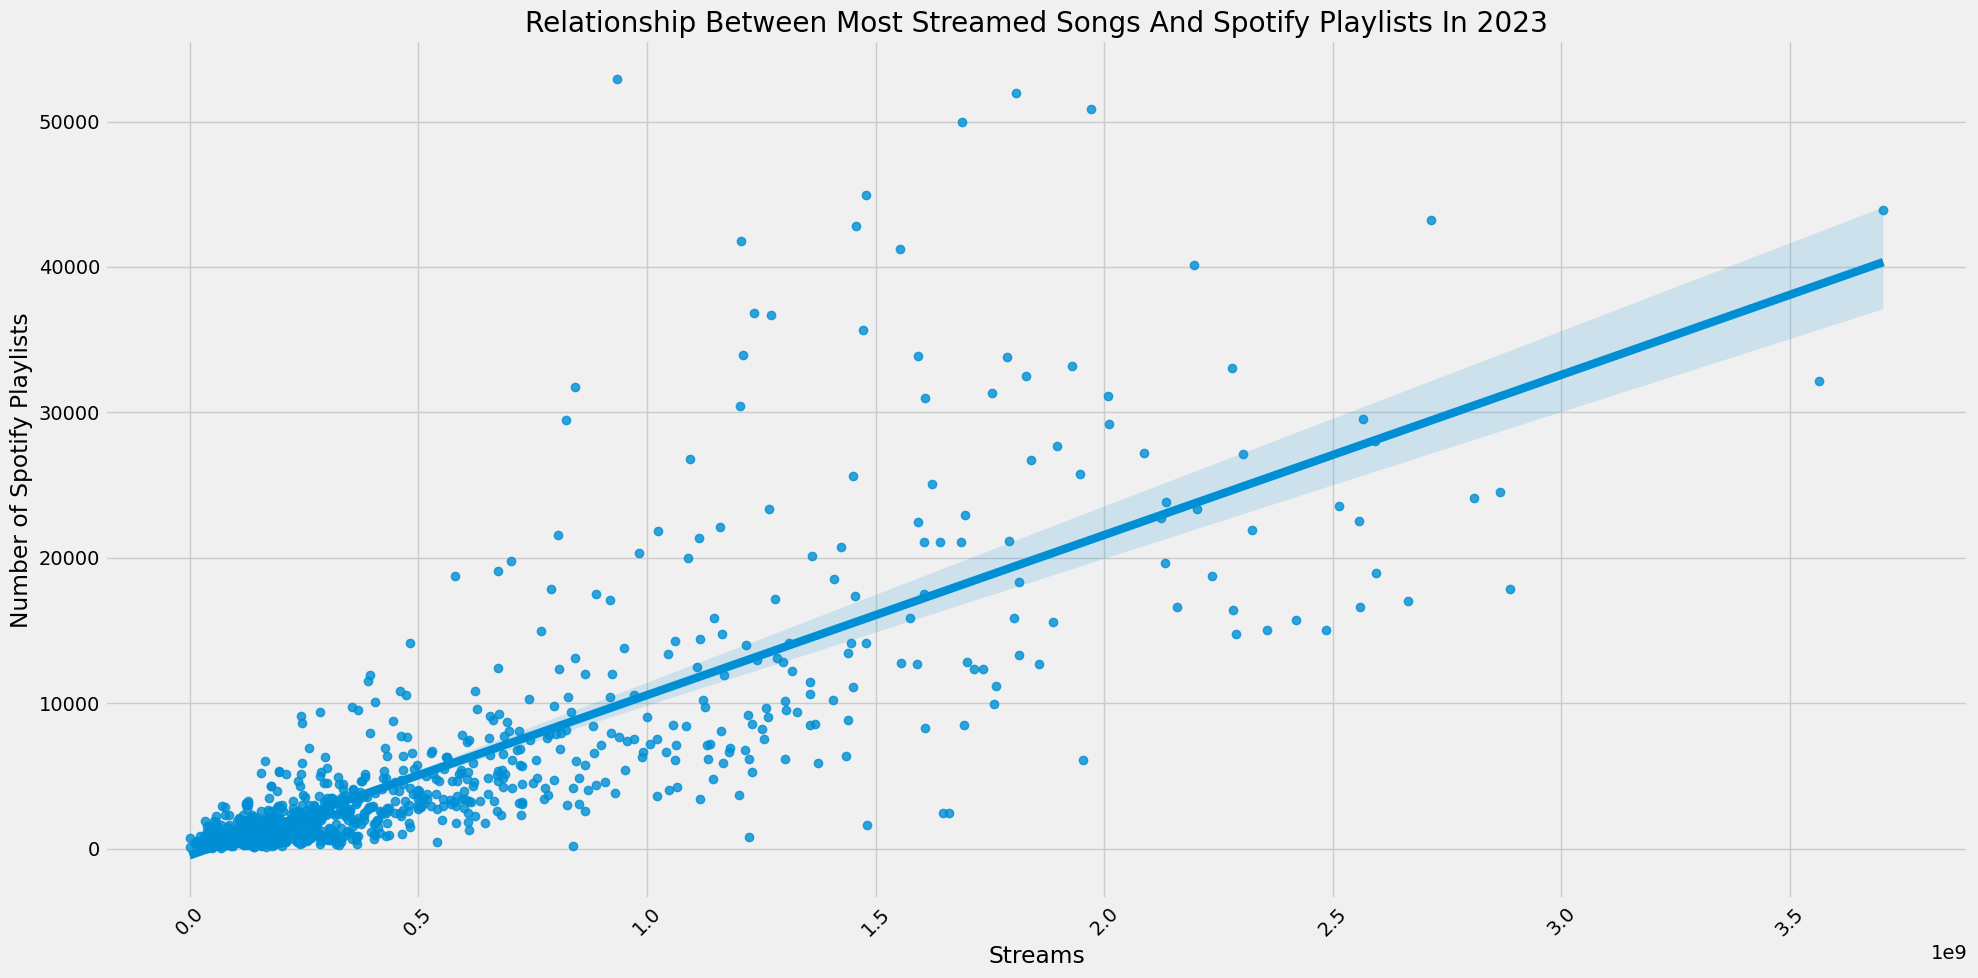

In [41]:
plt.figure(figsize = (20, 10))

sns.regplot(x = 'streams', y = 'in_spotify_playlists', data = df, scatter = True, fit_reg = True)

plt.title('Relationship Between Most Streamed Songs And Spotify Playlists In 2023')
plt.xlabel('Streams')
plt.ylabel('Number of Spotify Playlists')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### Apple music 

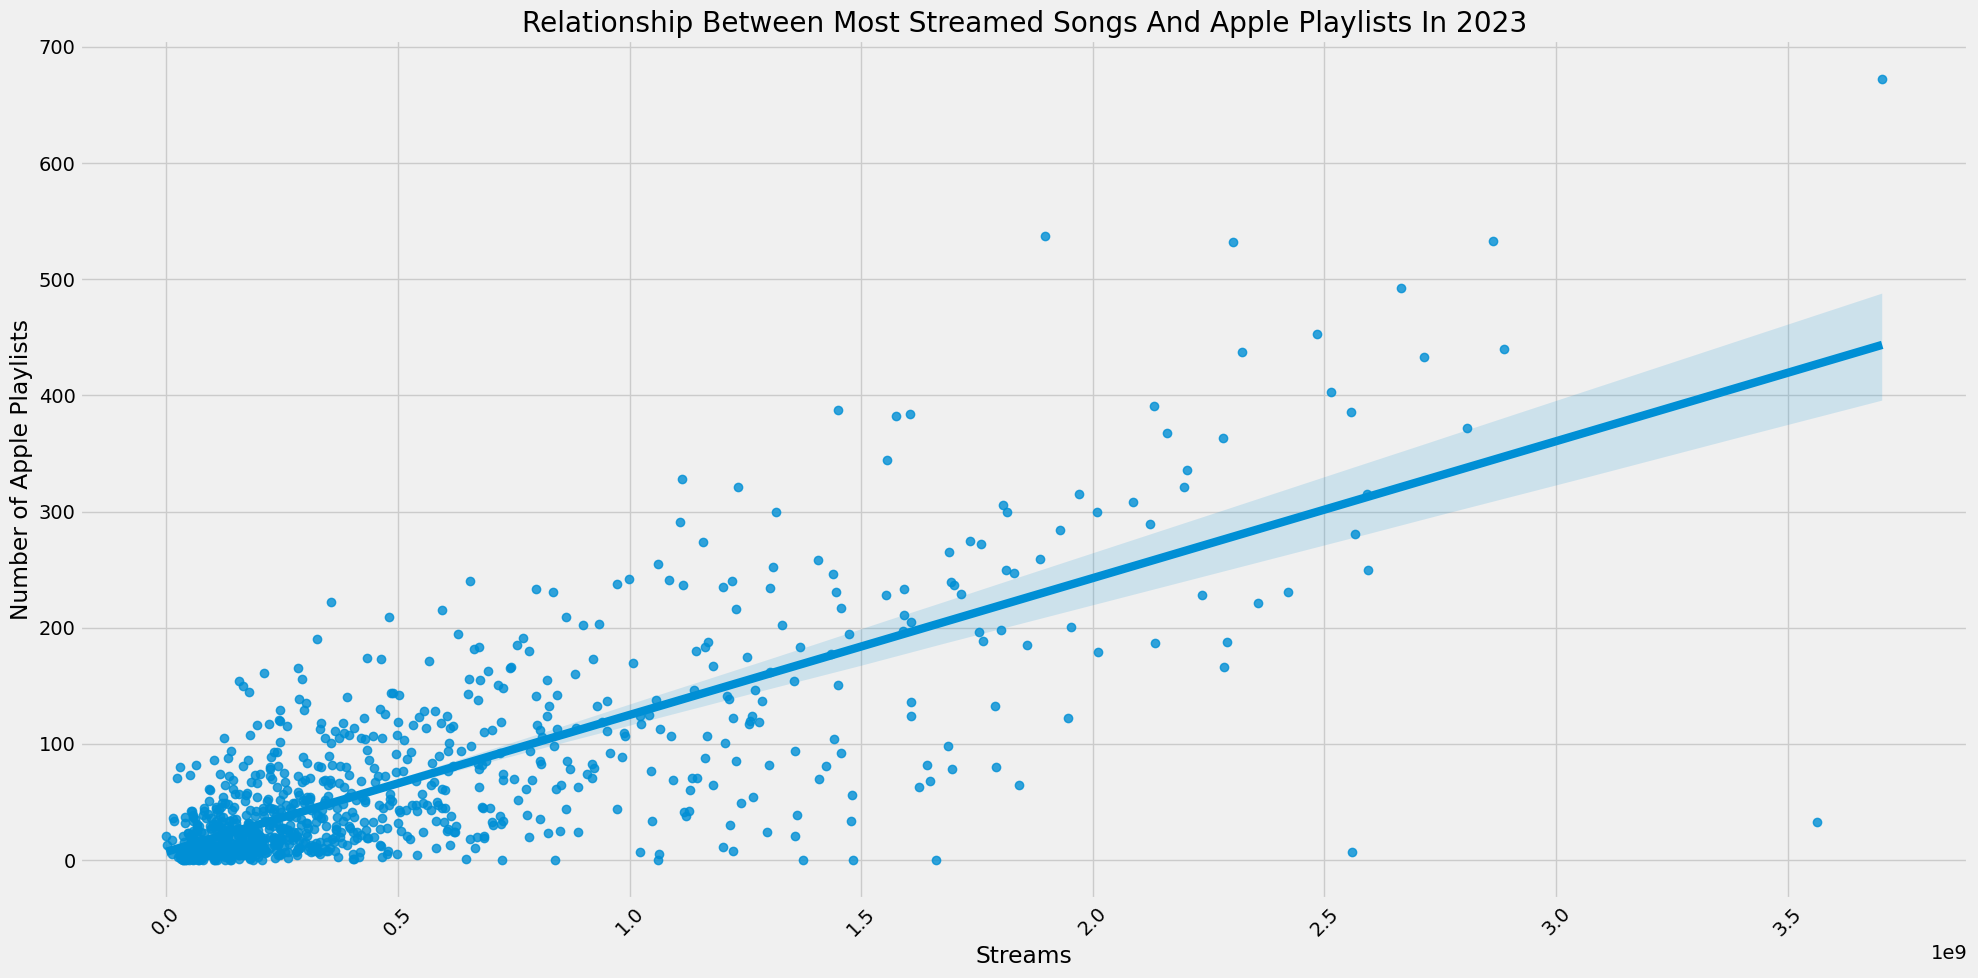

In [42]:
plt.figure(figsize = (20, 10))

sns.regplot(x = 'streams', y = 'in_apple_playlists', data = df, scatter = True, fit_reg = True)

plt.title('Relationship Between Most Streamed Songs And Apple Playlists In 2023')
plt.xlabel('Streams')
plt.ylabel('Number of Apple Playlists')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### Deezer Platform

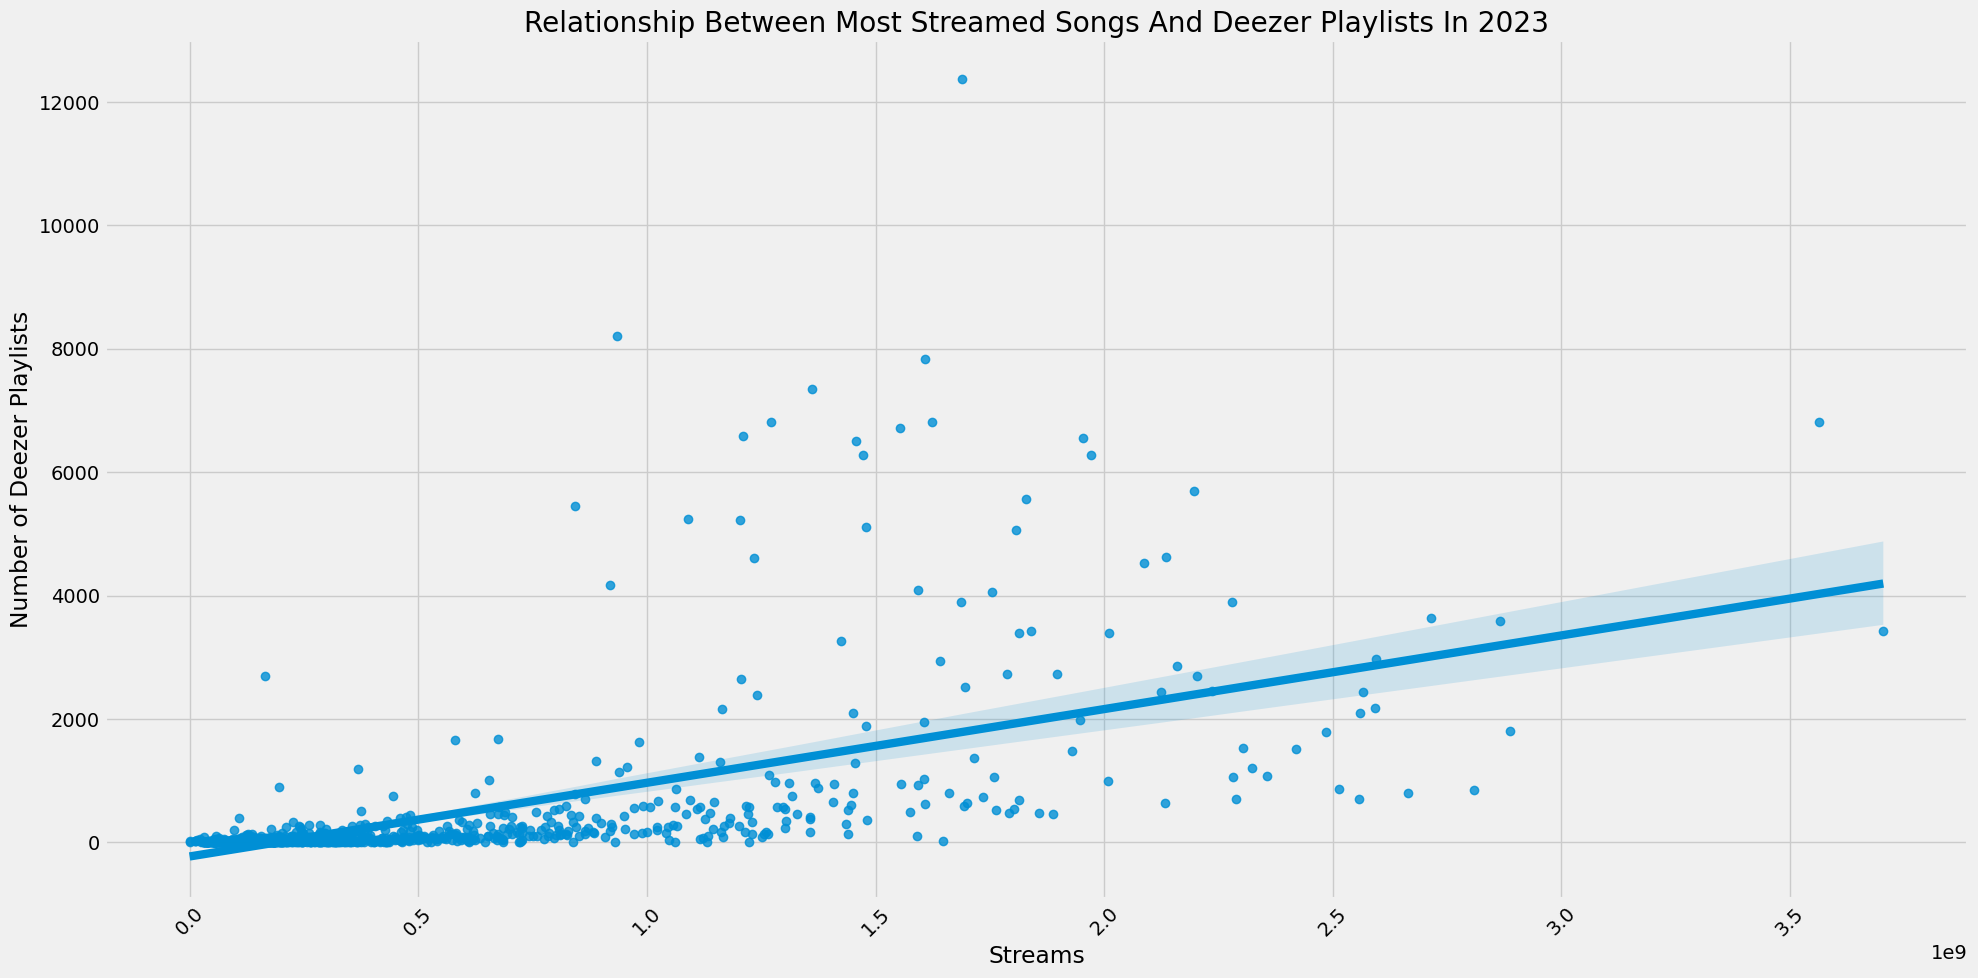

In [43]:
plt.figure(figsize = (20, 10))

sns.regplot(x = 'streams', y = 'in_deezer_playlists', data = df, scatter = True, fit_reg = True)

plt.title('Relationship Between Most Streamed Songs And Deezer Playlists In 2023')
plt.xlabel('Streams')
plt.ylabel('Number of Deezer Playlists')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### Relationship Between All Audio Features

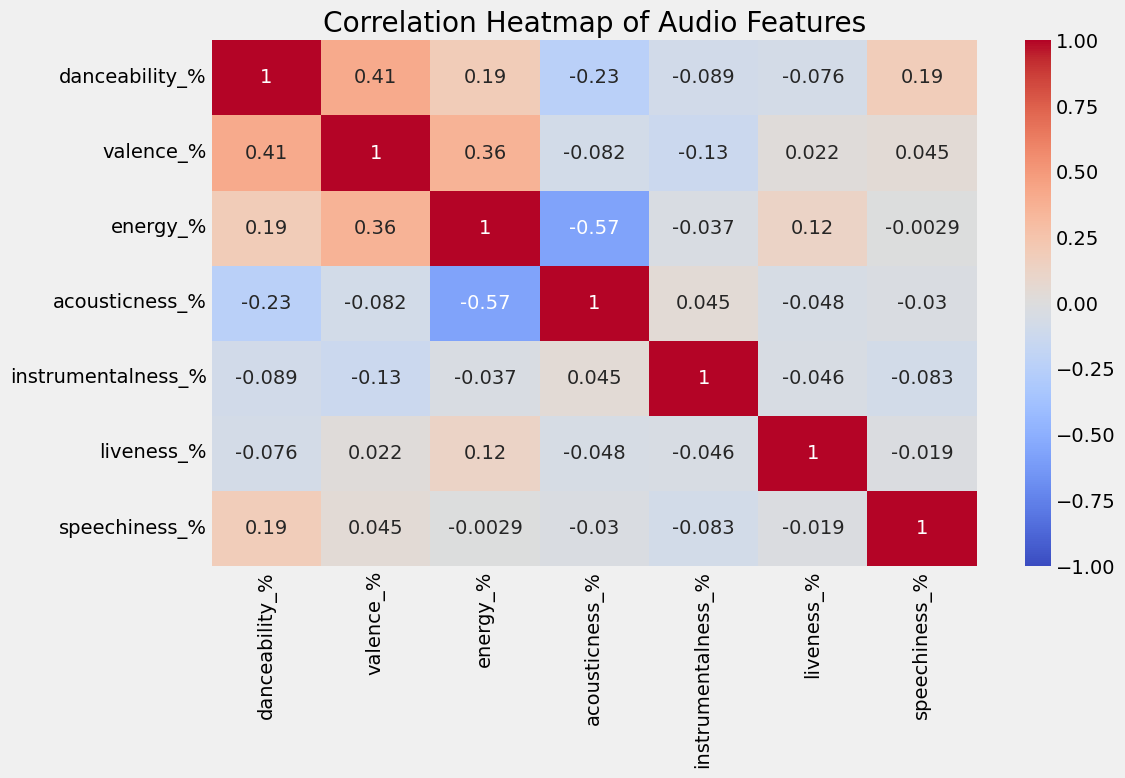

In [44]:
plt.figure(figsize = (12, 8))
corr = df[['danceability_%','valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%','liveness_%', 'speechiness_%']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin =- 1, vmax = 1)
plt.title('Correlation Heatmap of Audio Features')
plt.tight_layout()
plt.show()

### Average Streams by Release Month

Text(0, 0.5, 'Average Streams')

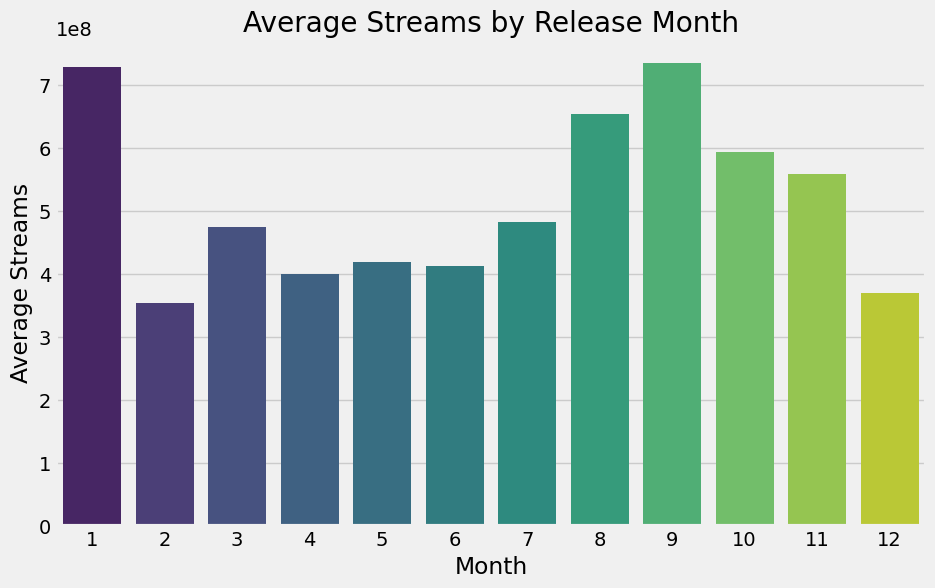

In [46]:

df['release_month'] = df['release_date'].dt.month
monthly_avg_streams = df.groupby('release_month')['streams'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_avg_streams.index, y=monthly_avg_streams.values, palette='viridis')
plt.title('Average Streams by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Streams')
#st.pyplot(plt)

Text(0, 0.5, 'Streams')

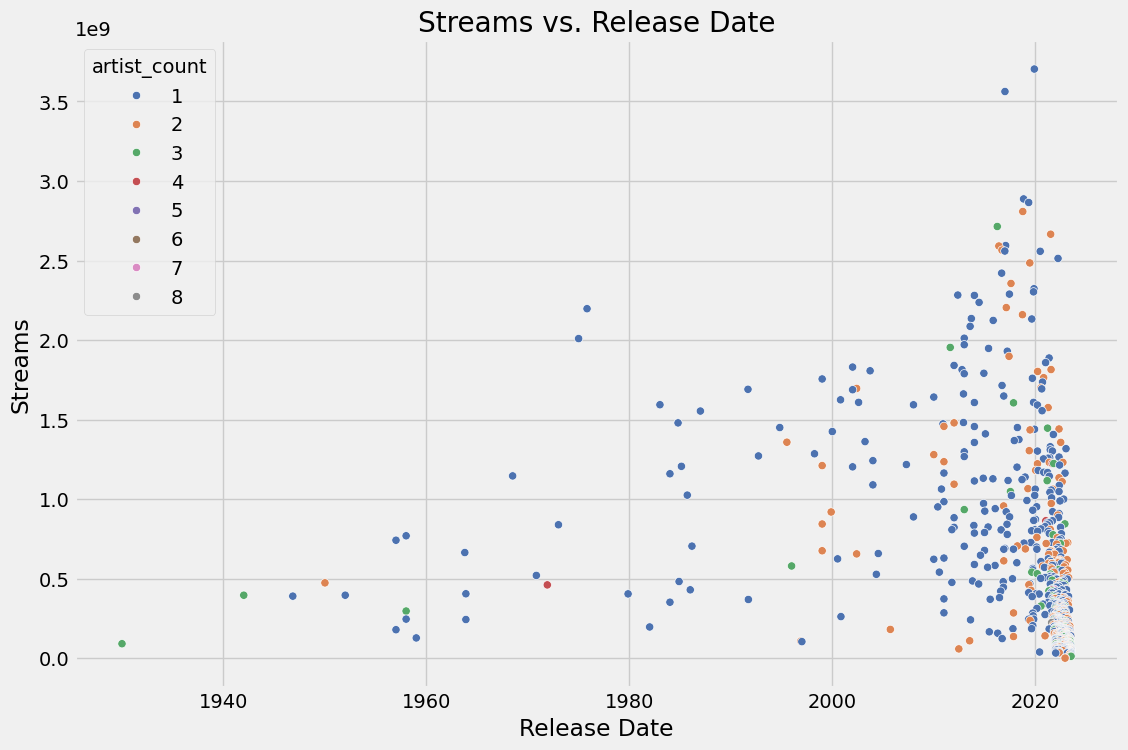

In [47]:
# Streams vs. Release Date
plt.figure(figsize=(12, 8))
sns.scatterplot(x='release_date', y='streams', data=df, hue='artist_count', palette='deep')
plt.title('Streams vs. Release Date')
plt.xlabel('Release Date')
plt.ylabel('Streams')

Text(0.5, 1.0, 'Correlation Between Audio Features and Streams')

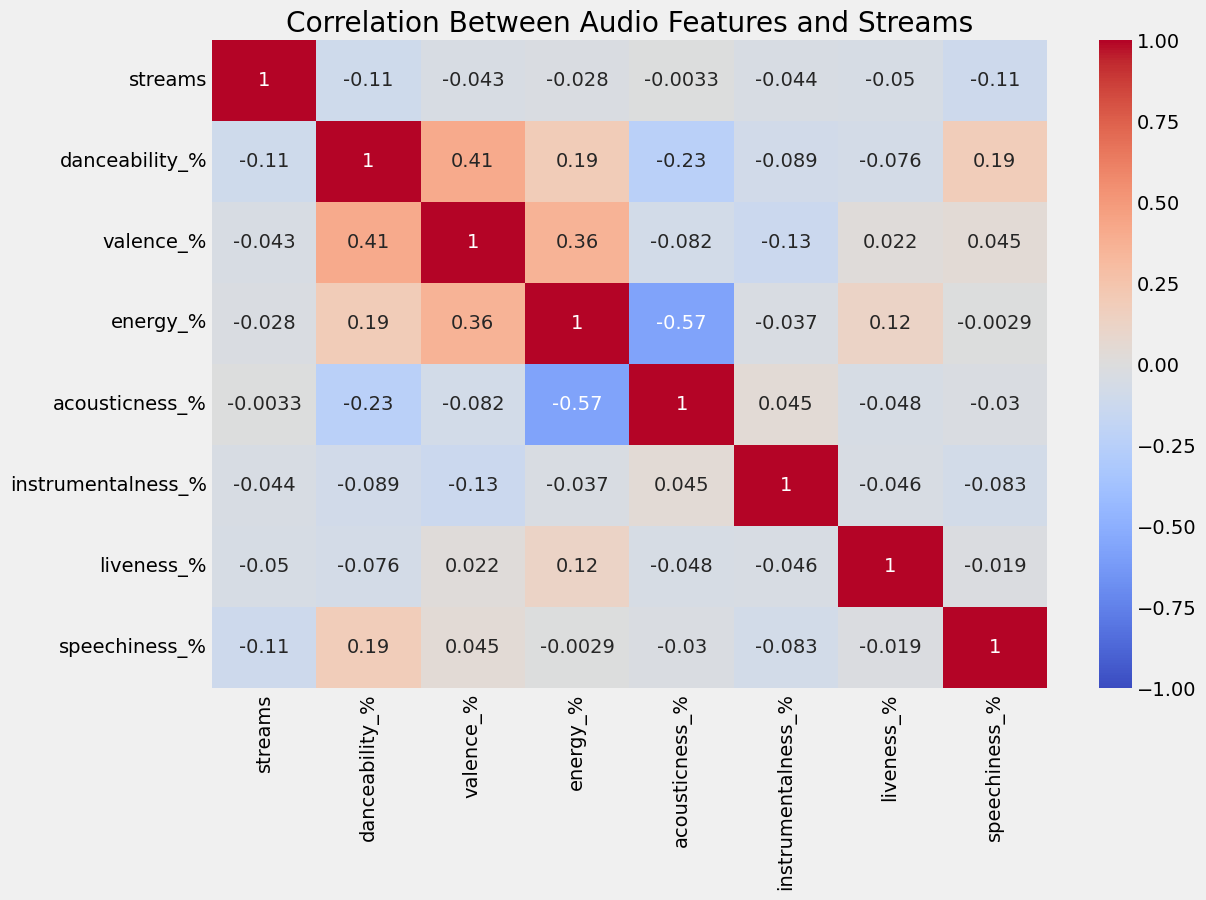

In [49]:
# Correlation Between Audio Features and Streams
plt.figure(figsize=(12, 8))
audio_corr = df[['streams', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
                 'instrumentalness_%', 'liveness_%', 'speechiness_%']].corr()
sns.heatmap(audio_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Audio Features and Streams')
